#Assignment: Linear Regression Analysis on  Health Insurance Charges
Objective
The goal of this assignment is to analyze a dataset containing factors that influence health  insurance charges and build a linear regression model to predict the charges. You will  perform data collection, exploratory data analysis (EDA), data cleaning, model building,  and evaluate the model's performance using Root Mean Squared Error (RMSE)


#Step 1: Data Collection

In [2]:
 # Mounting files to access the dataset (if needed)
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [3]:
# Loading dataset
import pandas as pd

df = pd.read_csv('insurance.csv')

In [5]:
#Displaying the first few rows of the dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#Step 2: Importing Required Packages


In [6]:
# Numerical operations and data handling
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning and model evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# Step 3: Exploratory Data Analysis (EDA)


In [7]:
# Basic information about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [9]:
# Statistical Summary of numeric columns
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [10]:
# Checking for missing values if present
print(df.isnull().sum())


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


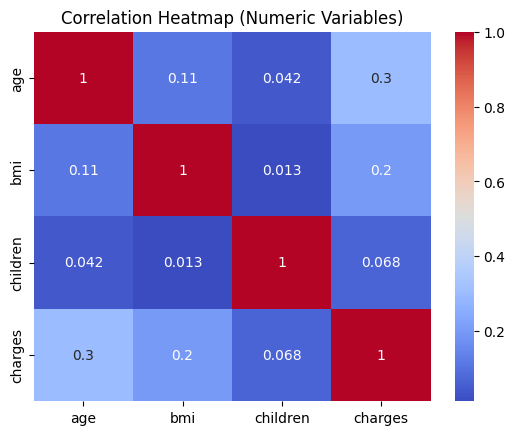

In [12]:
# Visualizing the correlation matrix for numeric variables
# Select only numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix and visualize it
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (Numeric Variables)")
plt.show()


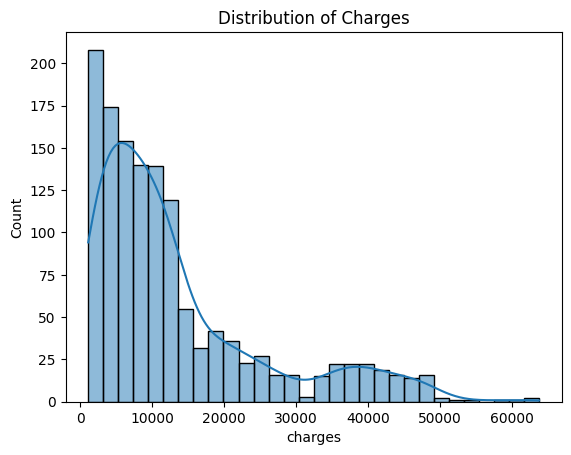

In [13]:
# Histogram of target variable (charges)
sns.histplot(df['charges'], kde=True, bins=30)
plt.title('Distribution of Charges')
plt.show()


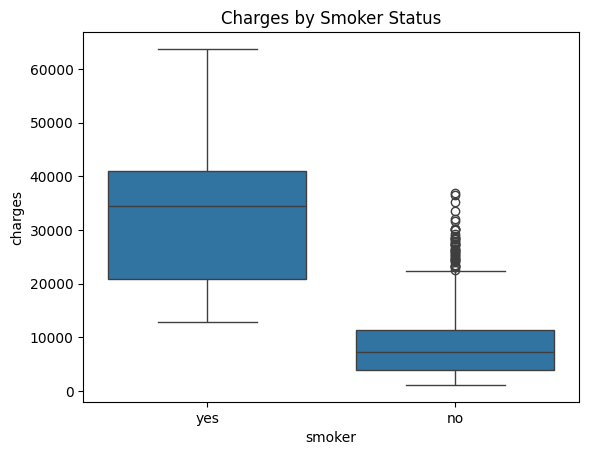

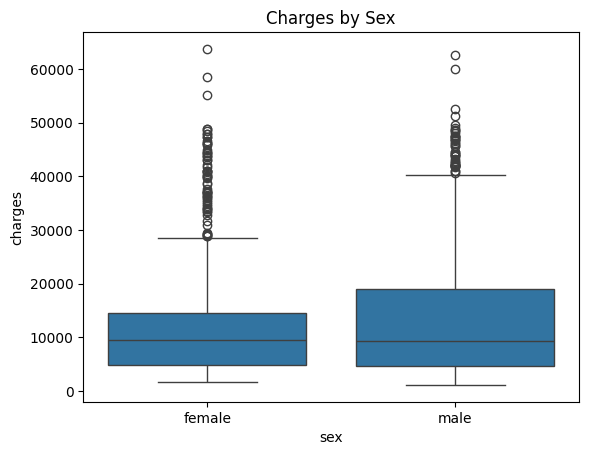

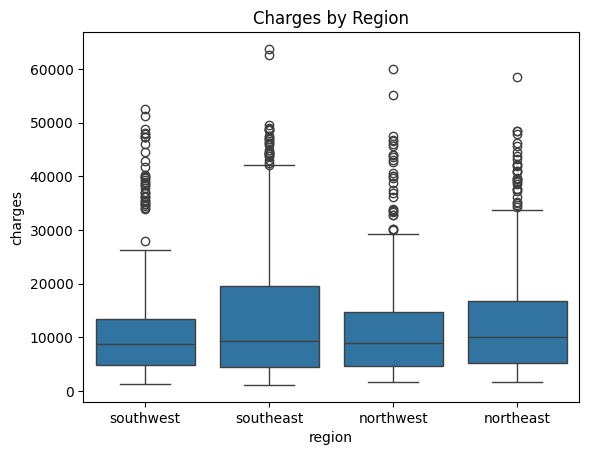

In [17]:
# Box plots to examine impact of categorical variables
sns.boxplot(x='smoker', y='charges', data=df)
plt.title('Charges by Smoker Status')
plt.show()

sns.boxplot(x='sex', y='charges', data=df)
plt.title('Charges by Sex')
plt.show()

sns.boxplot(x='region', y='charges', data=df)
plt.title('Charges by Region')
plt.show()


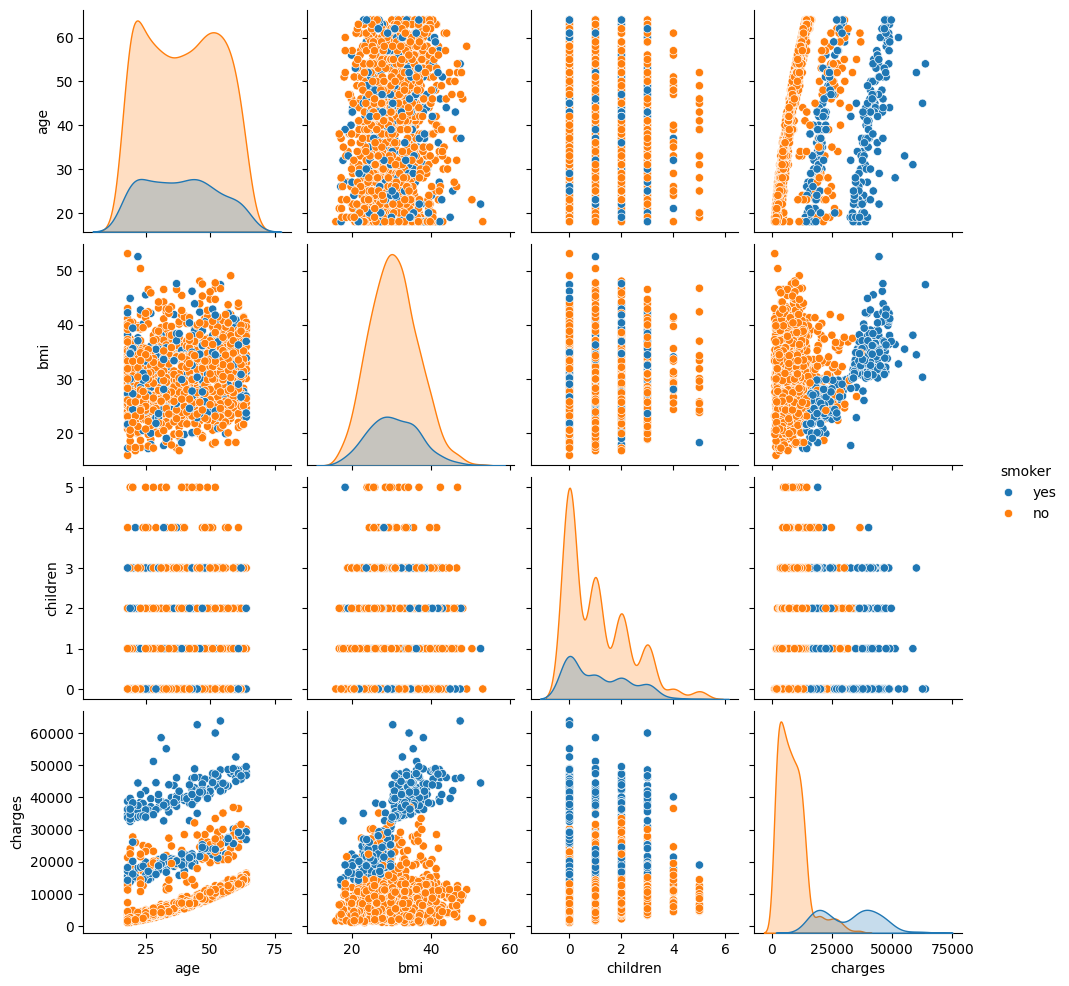

In [18]:
# Pairplotting to visualize relationships
sns.pairplot(df, hue='smoker')
plt.show()


# Step 4: Data Cleaning & Preprocessing

In [20]:
# Checking for and dropping any missing values (if present)
df.dropna(inplace=True)




In [21]:
# Converting categorical variables into numeric using one-hot encoding
# drop_first=True avoids dummy variable trap
df_encoded = pd.get_dummies(df, drop_first=True)



In [23]:
# Showing the first few rows of the processed dataset
df_encoded.head()


,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


# Step 5: Building the Linear Regression Model


In [24]:
# Defining the features (X) and the target variable (y)
X = df_encoded.drop('charges', axis=1)
y = df_encoded['charges']


In [25]:
# Splitting the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [32]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
lr_model = LinearRegression()


In [33]:
# Creating a Linear Regression model
lr_model = LinearRegression()


In [34]:
# Training the model on the training data
lr_model.fit(X_train, y_train)


LinearRegression()

In [35]:
# Predicting charges for the test data
y_pred = lr_model.predict(X_test)


In [36]:
#Displaying model coefficients (to see feature importance)
coeff_df = pd.DataFrame(lr_model.coef_, X.columns, columns=['Coefficient'])
print("Model Coefficients:")
print(coeff_df)

Model Coefficients:
                   Coefficient
age                 256.975706
bmi                 337.092552
children            425.278784
sex_male            -18.591692
smoker_yes        23651.128856
region_northwest   -370.677326
region_southeast   -657.864297
region_southwest   -809.799354


# Step 6: Evaluating the Model

In [37]:
# Calculating Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Root Mean Squared Error (RMSE): 5796.28


## 📝 **Brief Report: Linear Regression Analysis on Health Insurance Charges**

### **Objective**

The purpose of this analysis was to explore the factors influencing health insurance charges and to build a linear regression model capable of predicting these charges based on individual characteristics such as age, BMI, number of children, smoking status, gender, and region.

### **Data Overview**

The dataset contained **1,338 records** with the following features:

* **Numerical**: age, bmi, children
* **Categorical**: sex, smoker, region
* **Target variable**: charges (the amount billed for insurance)

There were no missing values in the dataset, and categorical features were converted into numeric format using one-hot encoding.

### **Exploratory Data Analysis**

Exploratory analysis showed that:

* **Smokers** tend to have significantly higher charges than non-smokers.
* **BMI** and **age** also showed positive correlations with charges.
* **Children**, **gender**, and **region** had relatively weaker relationships with charges.

### **Model Building**

A **Linear Regression** model was trained using:

* 80% of the data for training and 20% for testing.
* The model used all independent variables to predict the target (`charges`).

### **Model Evaluation**

The model's performance was evaluated using **Root Mean Squared Error (RMSE)**:

* **RMSE** = **\$5,796.28**

This means that, on average, the model’s predictions differ from the actual charges by approximately **\$5,796**. Given that insurance charges in the dataset range widely (often exceeding \$10,000 for smokers or older individuals), this RMSE indicates a **moderate level of error**. The model captures broad trends but lacks fine accuracy, possibly due to non-linear relationships or unmodeled interactions among features.

### **Conclusion**

The linear regression model provides a basic predictive baseline, with smoking status, age, and BMI emerging as the most influential factors. While the model gives a general idea of expected charges, the relatively high RMSE suggests room for improvement. More advanced models like **Random Forests** or **Gradient Boosting** could potentially offer better accuracy by capturing nonlinear patterns in the data.